In [22]:
# 1
import glob
import csv
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [23]:
# 2
dic = {}

for files in glob.glob('C:\\Users\\madhu\\Desktop\\Repositories\\Data_Science_2019501105\\DADV\\Exam_2021_2019501105\\Day\\*.csv'):
    f=open(files, 'r')
    name = os.path.basename(f.name).replace(".csv","")
    data = pd.read_csv(f)
    close = data["gainORloss"]
    val = close[len(close) - 1] - close[1]
    dic[name] = val
    f.close()

In [16]:
# 3
len(dic)


42

In [17]:
#4 sorting a dictionary
sorteddic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse = True)}

In [18]:
# 5
k = 1
top_dict = {}
for each in sorteddic.keys():
    top_dict[each] = sorteddic.get(each)
    k = k+1
    if(k == 26):
        break
        
dictio_keys = list(top_dict.keys())
dictio_values = list(top_dict.values())
df = pd.DataFrame()
df["Company"] = dictio_keys
df["Value"] = dictio_values 
df.to_csv("top_day.csv",index=False)
top_dict

{'AMD': 0.05141448530374104,
 'ABMD': 0.039631889665889375,
 'AMZN': 0.029865232542885423,
 'ALXN': 0.024878667236904572,
 'AKAM': 0.024765483959044765,
 'ALB': 0.02402040344121459,
 'ANSS': 0.01853821537496958,
 'ADBE': 0.018533408153382558,
 'ALK': 0.0179760181766917,
 'AAP': 0.016914576836309037,
 'ALGN': 0.01683477118372756,
 'AMCR': 0.016055798146647593,
 'ABBV': 0.015994297536426005,
 'ABC': 0.015661033063586904,
 'MMM': 0.01532801514452431,
 'APH': 0.013855780150666241,
 'A': 0.012475183234431642,
 'ADI': 0.01216699040473479,
 'APD': 0.010379106356937617,
 'MO': 0.00876292957164071,
 'GOOG': 0.008638192461975835,
 'AMGN': 0.008313157800810211,
 'AFL': 0.007456713909174573,
 'GOOGL': 0.006480486104972094,
 'AME': 0.0063860441801992796}

In [19]:
# 6
sorteddicrev = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}

In [20]:
# 7
k = 1
bottom_dict = {}
for each in sorteddicrev.keys():
    bottom_dict[each] = sorteddicrev.get(each)
    k = k+1
    if(k == 26):
        break
        
botmdictio_keys = list(bottom_dict.keys())
botmdictio_values = list(bottom_dict.values())
df = pd.DataFrame()
df["Company"] = botmdictio_keys
df["Value"] = botmdictio_values 
df.to_csv("bottom_day.csv",index=False)
bottom_dict

{'AMT': -0.06049500999319424,
 'AEP': -0.033512546968739176,
 'AEE': -0.027486675500526303,
 'AES': -0.027138692764468786,
 'AAL': -0.025629721700269226,
 'AWK': -0.022661649305926623,
 'LNT': -0.022304710141530792,
 'ARE': -0.01460448911808343,
 'AON': -0.013378768121651508,
 'ANTM': -0.012678833841387016,
 'AIG': -0.00486984894162279,
 'ALLE': -0.004277453249310836,
 'AXP': -0.00299321956671883,
 'ATVI': -0.0024031273647120432,
 'ALL': -0.0023946992205921003,
 'AMP': 0.0048329164690104065,
 'ABT': 0.005966392983412838,
 'AME': 0.0063860441801992796,
 'GOOGL': 0.006480486104972094,
 'AFL': 0.007456713909174573,
 'AMGN': 0.008313157800810211,
 'GOOG': 0.008638192461975835,
 'MO': 0.00876292957164071,
 'APD': 0.010379106356937617,
 'ADI': 0.01216699040473479}

In [37]:
# 8
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import math
from scipy import interpolate
corrlis = []
for each1 in top_dict.keys():
    for each2 in top_dict.keys():
        corr_value = np.corrcoef(top_dict.get(each1), top_dict.get(each2))[0][1]
        corrlis.append(corr_value)
        
len(corrlis)

625

In [9]:
# 9
top_data = pd.read_csv("top_day.csv")
bottom_data = pd.read_csv("bottom_day.csv")
gicssectors = pd.read_csv("GICSSector.csv")
day_topdata = pd.merge(top_data, gicssectors, on="Company")
day_bottomdata = pd.merge(bottom_data, gicssectors, on="Company")

In [10]:
# 10
day_topdata_name = list(day_topdata["GICS_Sector"])
day_bottomdata_name = list(day_bottomdata["GICS_Sector"])

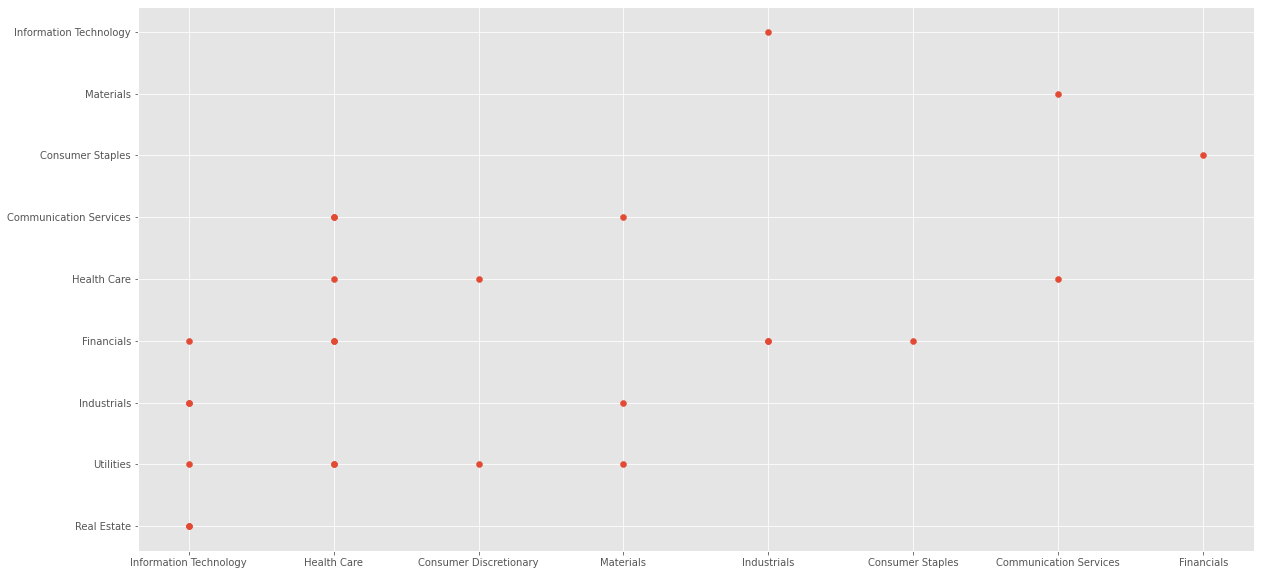

In [11]:
# 11
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(day_topdata_name, day_bottomdata_name)
plt.show()